In [45]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../utils')
import utils

In [46]:
# Import csv to df
df = pd.read_csv('../data/renttherunway_cleaned_data.csv')

In [47]:
print(df.columns)
# print(df)

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'review_length', 'band_size',
       'cup_size'],
      dtype='object')


In [48]:
# Analysis

In [49]:
def plot_histogram(df, column, max_value, min_value=0, bin_width=5):
    """
    Plots a histogram for a specified column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column for which to plot the histogram.
    max_value (int or float): The maximum value to include in the histogram.
    bin_width (int or float): The width of each bin in the histogram.

    Returns:
    None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    # Ensure the column is numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Drop NaN values from the column
    df = df.dropna(subset=[column])

    # Ensure values are within the specified range
    df = df[df[column] <= max_value]

    # Calculate the minimum value and number of bins
    min_value = df[column].min()
    num_bins = int(np.ceil((max_value - min_value) / bin_width))

    # Calculate bin edges for the histogram
    bin_edges = np.linspace(min_value, max_value, num_bins + 1)

    # Plotting
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=bin_edges, edgecolor='black', color=utils.primary_color)

    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')

    # Set x-axis ticks to align with the histogram bin edges
    plt.xticks(bin_edges)

    plt.show()


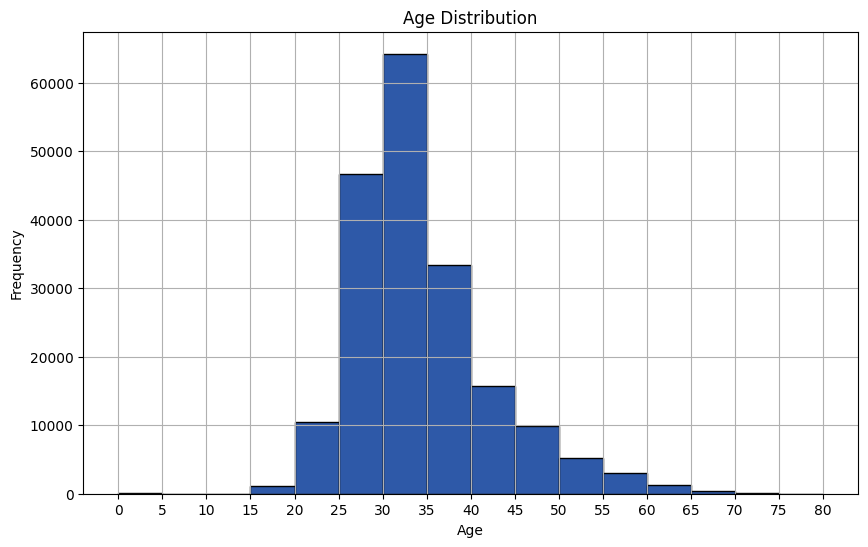

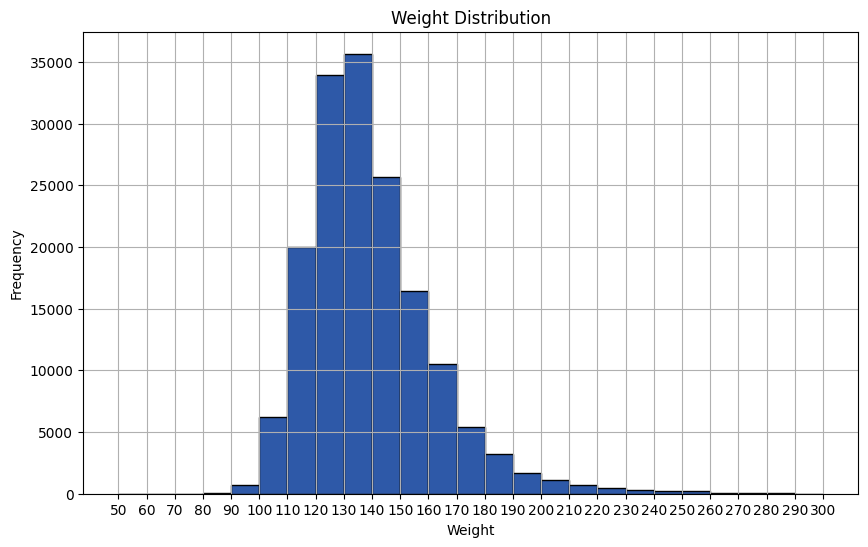

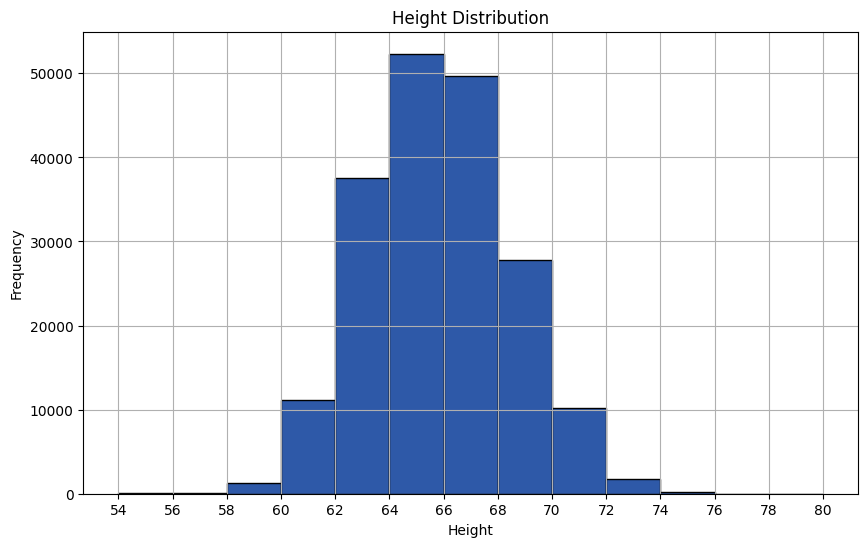

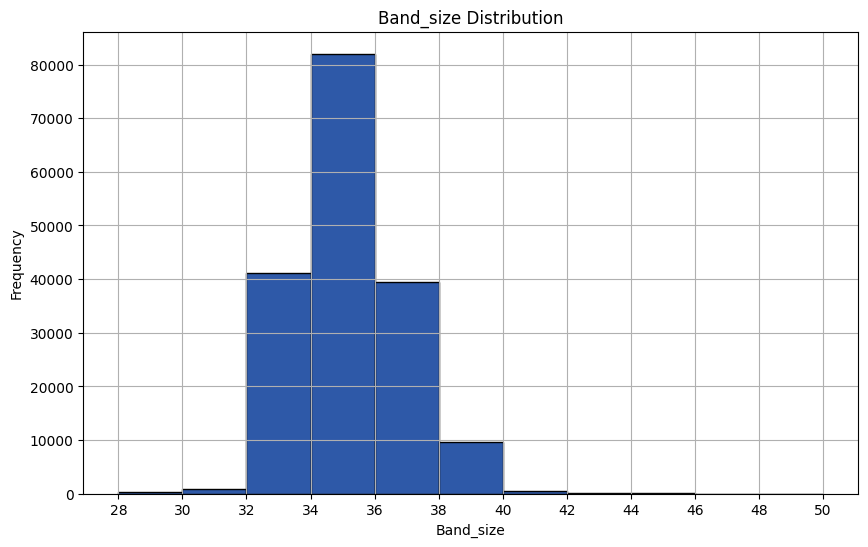

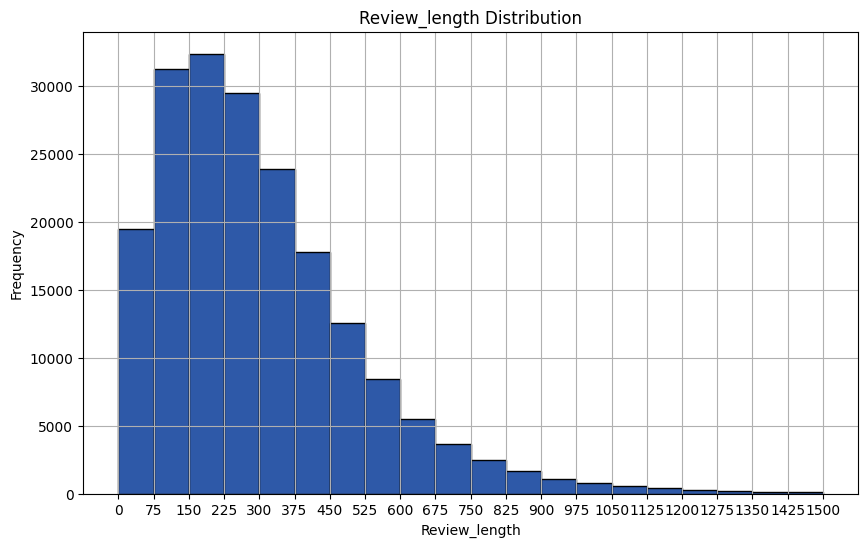

In [50]:
plot_histogram(df, 'age', 80, bin_width=5)
plot_histogram(df, 'weight', 300, min_value=50, bin_width=10)
plot_histogram(df, 'height', 80, min_value=50, bin_width=2)
plot_histogram(df, 'band_size', 50, min_value=0, bin_width=2)
plot_histogram(df, 'review_length', 1500, min_value=0, bin_width=75)

In [51]:
def plot_bar_counts(df, column):
    """
    Generates a bar plot with the counts of each unique value in the specified column.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column for which to plot the bar chart.

    Returns:
    None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    # Calculate counts of each unique value
    counts = df[column].value_counts().sort_values(ascending=True)
    counts = counts[counts >= 0]
    total_count = counts.sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind='bar', edgecolor='black', color=utils.primary_color)

    plt.title(f'Counts of Each Unique Value in {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Counts')

    # Adding text annotations above bars
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{(count / total_count * 100):.2f}%'
        annotation = f'{count}\n({percentage})'
        ax.annotate(annotation, (p.get_x() * 1.005, count * 1.005))

    plt.show()


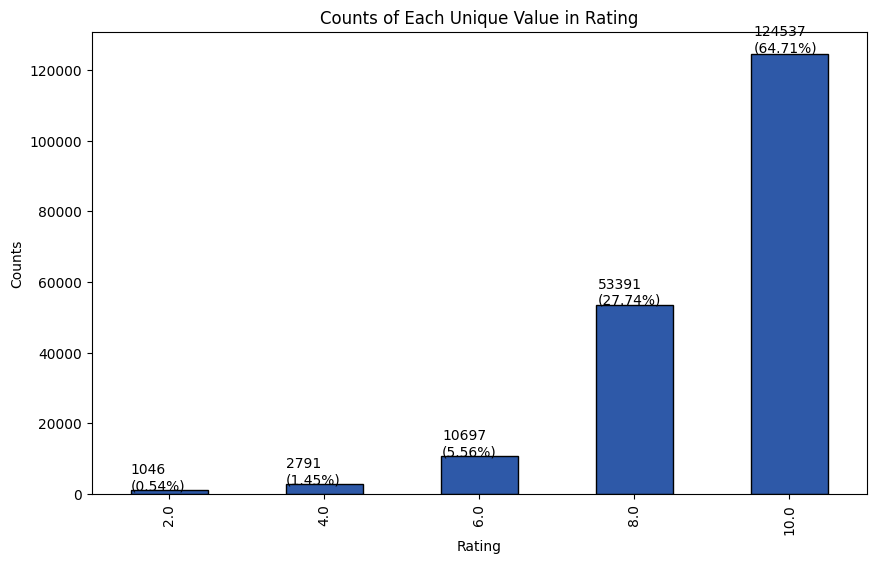

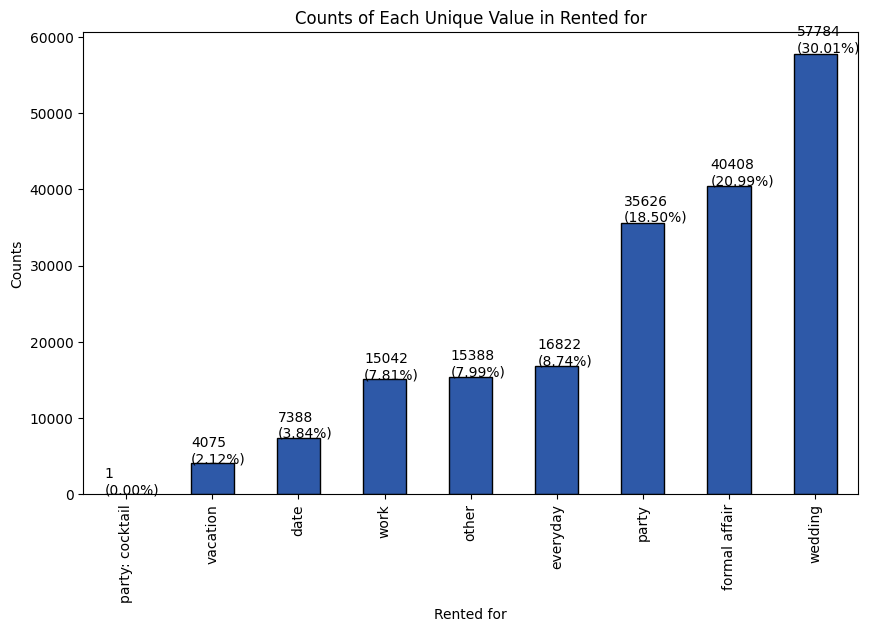

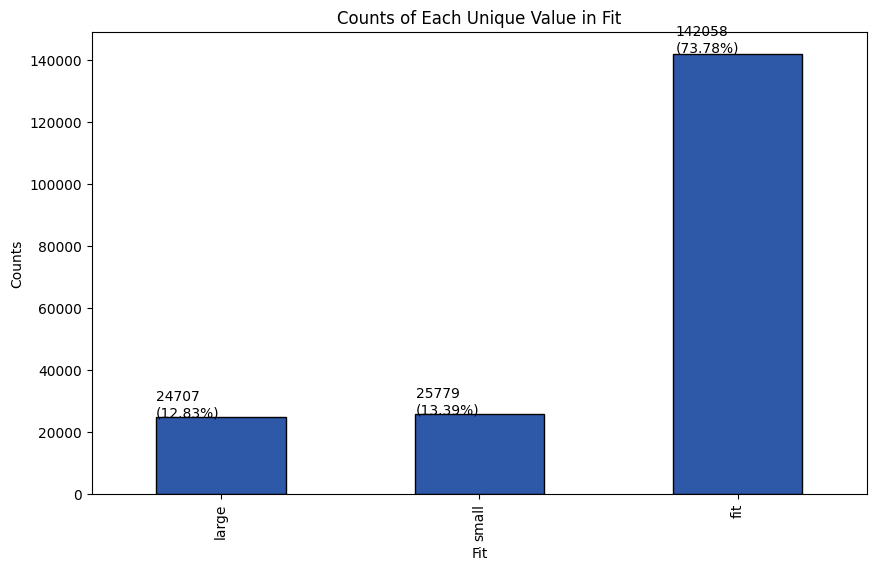

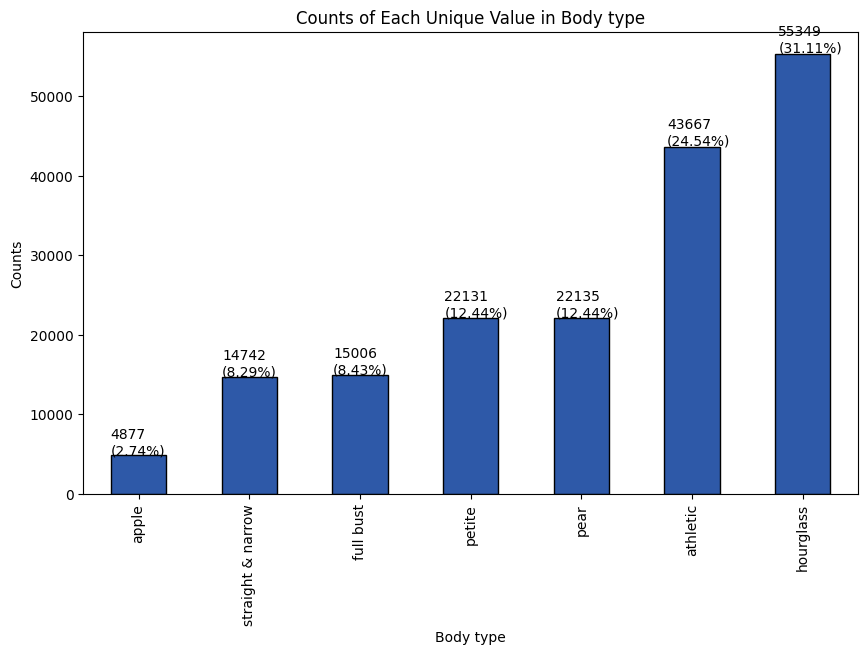

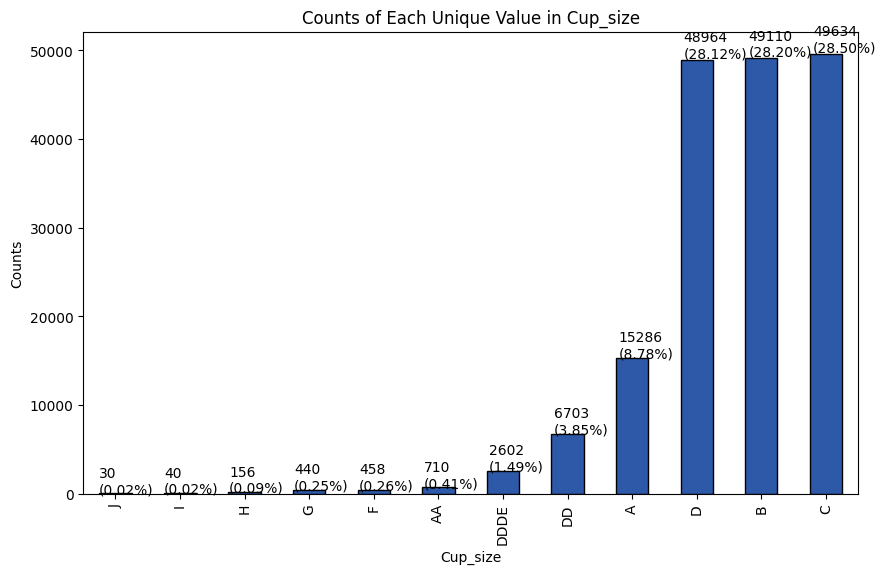

In [52]:
plot_bar_counts(df, 'rating')
plot_bar_counts(df, 'rented for')
plot_bar_counts(df, 'fit')
# plot_bar_counts(df, 'bust_size')
plot_bar_counts(df, 'body type')
# plot_bar_counts(df, 'category')
# plot_bar_counts(df, 'size')
# plot_bar_counts(df, 'band_size')
plot_bar_counts(df, 'cup_size')

In [53]:
top_n = 5

# Print top 10 most common categories
print(df['category'].value_counts().head(top_n))
print()

# Write each as a percent of the total
print(df['category'].value_counts(normalize=True).head(top_n))
print()

# Sum up the percents
print(f"Sum of percents of top 5:", df['category'].value_counts(normalize=True).head(5).sum())
print(f"Sum of percents of top 10:", df['category'].value_counts(normalize=True).head(10).sum())
print()

# Print number of categories
print("Number of categories:", len(df['category'].unique()))
print()

# This is showing that despite a lot of categories, the top 10 make up 95% of the data
# Can discuss this in exploratory analysis

category
dress       92884
gown        44381
sheath      19316
shift        5365
jumpsuit     5184
Name: count, dtype: int64

category
dress       0.482404
gown        0.230498
sheath      0.100320
shift       0.027864
jumpsuit    0.026924
Name: proportion, dtype: float64

Sum of percents of top 5: 0.8680093900614925
Sum of percents of top 10: 0.9490246385241816

Number of categories: 68



In [54]:
# Print cols
print(df.columns)

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'review_length', 'band_size',
       'cup_size'],
      dtype='object')


In [55]:
# For categories rating, size, age, weight, give the mean and standard deviation
cols = ['rating', 'size', 'age', 'weight', 'height']
print(df[cols].describe())


              rating           size            age         weight   
count  192462.000000  192544.000000  191584.000000  162562.000000  \
mean        9.092371      12.245175      33.871017     137.391709   
std         1.430044       8.494877       8.058083      21.899967   
min         2.000000       0.000000       0.000000      50.000000   
25%         8.000000       8.000000      29.000000     123.000000   
50%        10.000000      12.000000      32.000000     135.000000   
75%        10.000000      16.000000      37.000000     148.000000   
max        10.000000      58.000000     117.000000     300.000000   

              height  
count  191867.000000  
mean       65.310621  
std         2.663480  
min        54.000000  
25%        63.000000  
50%        65.000000  
75%        67.000000  
max        78.000000  
